In [ ]:
from pathlib import Path
import sys

sys.path.append(str(Path().cwd().parent))
import networkx as nx
import numpy as np
from matrix import are_similar, get_least_cell_quotient, permute_matrix_by_partition
from itertools import combinations
from numpy import trace
from networkx import is_bipartite

In [ ]:
tolerance = 1e-10
n = 9

In [ ]:
path = f"../graphs/graph{n}c.g6.txt"
f = open(path, "r")

candidates = []

for line in f:
    g6 = line.strip()
    G = nx.from_graph6_bytes(g6.encode())
    A = nx.to_numpy_array(G, dtype=int)
    # One representative per similarity class, per loop count (here 1 loop)
    
    for i in range(1, n):
        for comb in combinations(range(n), i):
            B = A.copy()
            for j in comb:
                B[j, j] = 1
            eigenvalues = np.linalg.eigvalsh(B)
            rounded_eigenvalues = np.round(eigenvalues / tolerance) * tolerance
            unique_eigenvalues = np.unique(rounded_eigenvalues)


            if len(unique_eigenvalues) == 3:
                is_duplicate = any(trace(B) == trace(C) and are_similar(B, C) for C in candidates)
                if not is_duplicate and is_bipartite(G):
                    D = A.copy()
                    for j in range(n):
                        if j not in comb:
                            D[j, j] = 1
                    is_duplicate = any(trace(D) == trace(C) and are_similar(D, C) for C in candidates)
                if not is_duplicate:
                    candidates.append(B)
                    print(B)
                    print(unique_eigenvalues)
                    print("\n")

[[0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1]]
[-2.37228132 -0.          3.37228132]


[[0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[-2.87298335 -0.          4.87298335]


[[0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[-3. -0.  6.]


[[0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[-2.89897949  0.          6.89897949]


[[0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1]

In [ ]:
l_shape = []
row_sum_candidates = []
l_shape_row_sum_candidates = []
others = []

for candidate in candidates:
    row_sum = np.sum(candidate, axis=1)
    unique_row_sum = np.unique(row_sum)
    x1, x2 = unique_row_sum if len(unique_row_sum) == 2 else (0, 0)
    if all(row_sum == row_sum[0]):
        row_sum_candidates.append(candidate)
    elif len(unique_row_sum) == 2 and (x1 == n and sum(row_sum == n) == x2 or x2 == n and sum(row_sum == n) == x1):
        l_shape.append(candidate)
    else:
        sub_matrix = candidate.copy()
        mask = row_sum != n
        sub_matrix = candidate[np.ix_(mask, mask)]
        sub_matrix_row_sum = np.sum(sub_matrix, axis=1)
        mask = sub_matrix_row_sum != 0
        if all(sub_matrix_row_sum[mask] == sub_matrix_row_sum[mask][0]):
            l_shape_row_sum_candidates.append(candidate)
        else:
            others.append(candidate)

In [ ]:
print("num of candidates: ", len(candidates))
print("num of row sum candidates: ", len(row_sum_candidates))
print("num of l shape candidates: ", len(l_shape))
print("num of l shape row sum candidates: ", len(l_shape_row_sum_candidates))
print("num of others: ", len(others))

num of candidates:  20
num of row sum candidates:  4
num of l shape candidates:  8
num of l shape row sum candidates:  3
num of others:  5


In [ ]:
for other in others:
    print(other)
    # print(np.linalg.eigh(other))
    print(np.sum(other, axis=1))
    print("\n")

[[0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 1 1 1]
 [1 0 1 0 0 1 0 1 1]
 [1 0 0 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1]]
[5 2 2 2 2 5 5 5 9]


[[0 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0 1 1]
 [1 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 1 1]
 [1 1 0 1 1 0 1 1 1]
 [1 0 1 1 0 1 1 1 1]
 [0 1 1 0 1 1 1 1 1]]
[3 3 3 3 3 3 7 7 7]


[[0 0 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 0]
 [0 0 1 0 0 1 1 1 1]
 [1 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 0 1]
 [0 1 1 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 1]]
[3 3 5 3 3 5 3 3 5]


[[0 0 1 0 1 0 1 1 1]
 [0 0 0 1 0 1 0 0 1]
 [1 0 0 0 1 0 1 1 1]
 [0 1 0 0 0 1 0 0 1]
 [1 0 1 0 0 0 1 1 1]
 [0 1 0 1 0 0 0 0 1]
 [1 0 1 0 1 0 0 1 1]
 [1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1]]
[5 3 5 3 5 3 5 5 9]


[[0 0 1 0 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 1]
 [1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1]
 [1 0 1 0 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1]
 [1 0 1 0 1 1 0 1 1]
 [1 0

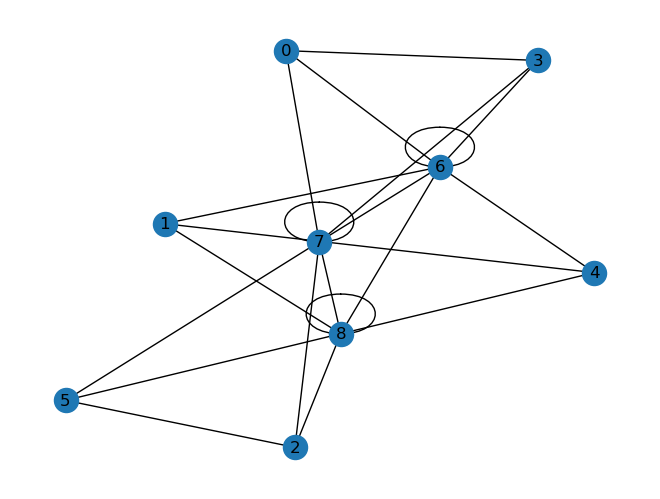

In [ ]:
q_mat, part = get_least_cell_quotient(others[1])
permuted, perm = permute_matrix_by_partition(others[1], part)
nx.draw(nx.from_numpy_array(permuted), with_labels=True)

In [ ]:
perm

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
part

array([0, 0, 0, 0, 0, 0, 1, 1, 1])